# Assignment 1 Part B

In [1]:
#Import libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.regularizers import l2
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

In [2]:
#Set Variables
NUM_CLASSES = 7

epochs = 300
batch_size = 8
num_neurons = 10
seed = 10

histories={}

np.random.seed(seed)
tf.random.set_seed(seed)


In [3]:
#Additional Variables
learningRate = 10^-3 #As defined in the assignment
decay = 10^-3 #As defined in the assignment

#Set learning rate
opt = tf.keras.optimizers.SGD(learning_rate=learningRate)

In [5]:
#read and divide data into test and train sets 
admit_data = np.genfromtxt('admission_predict.csv', delimiter= ',')
X_data, Y_data = admit_data[1:,1:8], admit_data[1:,-1]
Y_data = Y_data.reshape(Y_data.shape[0], 1)

idx = np.arange(X_data.shape[0])
np.random.shuffle(idx)
X_data, Y_data = X_data[idx], Y_data[idx]

In [6]:
# experiment with small datasets
trainX,testX,trainY,testY=train_test_split(X_data, Y_data,
train_size=0.7,
test_size=0.3)

trainX = (trainX- np.mean(trainX, axis=0))/ np.std(trainX, axis=0)

#Check shape of train set
print(trainX.shape)
print(trainY.shape)
print(testX.shape)
print(testY.shape)

(280, 7)
(280, 1)
(120, 7)
(120, 1)


In [7]:
# create a network
ffn_model = keras.Sequential([
    keras.layers.Dense(num_neurons, activation='relu',kernel_regularizer=l2(decay)),
    keras.layers.Dense(NUM_CLASSES, activation='linear')
])

ffn_model.compile(optimizer='sgd',
              loss=keras.losses.MeanSquaredError(),
              metrics=['mse'])

In [8]:
# learn the network for train
histories['ffn_train'] = ffn_model.fit(trainX, trainY,
                                        epochs=epochs,
                                        batch_size=batch_size,
                                        verbose = 2)


Epoch 1/300
35/35 - 0s - loss: nan - mse: nan
Epoch 2/300
35/35 - 0s - loss: nan - mse: nan
Epoch 3/300
35/35 - 0s - loss: nan - mse: nan
Epoch 4/300
35/35 - 0s - loss: nan - mse: nan
Epoch 5/300
35/35 - 0s - loss: nan - mse: nan
Epoch 6/300
35/35 - 0s - loss: nan - mse: nan
Epoch 7/300
35/35 - 0s - loss: nan - mse: nan
Epoch 8/300
35/35 - 0s - loss: nan - mse: nan
Epoch 9/300
35/35 - 0s - loss: nan - mse: nan
Epoch 10/300
35/35 - 0s - loss: nan - mse: nan
Epoch 11/300
35/35 - 0s - loss: nan - mse: nan
Epoch 12/300
35/35 - 0s - loss: nan - mse: nan
Epoch 13/300
35/35 - 0s - loss: nan - mse: nan
Epoch 14/300
35/35 - 0s - loss: nan - mse: nan
Epoch 15/300
35/35 - 0s - loss: nan - mse: nan
Epoch 16/300
35/35 - 0s - loss: nan - mse: nan
Epoch 17/300
35/35 - 0s - loss: nan - mse: nan
Epoch 18/300
35/35 - 0s - loss: nan - mse: nan
Epoch 19/300
35/35 - 0s - loss: nan - mse: nan
Epoch 20/300
35/35 - 0s - loss: nan - mse: nan
Epoch 21/300
35/35 - 0s - loss: nan - mse: nan
Epoch 22/300
35/35 - 0

In [9]:
# learn the network for test
histories['ffn_test'] = ffn_model.fit(testX, testY,
                                        epochs=epochs,
                                        batch_size=batch_size,
                                        verbose = 2)


Epoch 1/300
15/15 - 0s - loss: nan - mse: nan
Epoch 2/300
15/15 - 0s - loss: nan - mse: nan
Epoch 3/300
15/15 - 0s - loss: nan - mse: nan
Epoch 4/300
15/15 - 0s - loss: nan - mse: nan
Epoch 5/300
15/15 - 0s - loss: nan - mse: nan
Epoch 6/300
15/15 - 0s - loss: nan - mse: nan
Epoch 7/300
15/15 - 0s - loss: nan - mse: nan
Epoch 8/300
15/15 - 0s - loss: nan - mse: nan
Epoch 9/300
15/15 - 0s - loss: nan - mse: nan
Epoch 10/300
15/15 - 0s - loss: nan - mse: nan
Epoch 11/300
15/15 - 0s - loss: nan - mse: nan
Epoch 12/300
15/15 - 0s - loss: nan - mse: nan
Epoch 13/300
15/15 - 0s - loss: nan - mse: nan
Epoch 14/300
15/15 - 0s - loss: nan - mse: nan
Epoch 15/300
15/15 - 0s - loss: nan - mse: nan
Epoch 16/300
15/15 - 0s - loss: nan - mse: nan
Epoch 17/300
15/15 - 0s - loss: nan - mse: nan
Epoch 18/300
15/15 - 0s - loss: nan - mse: nan
Epoch 19/300
15/15 - 0s - loss: nan - mse: nan
Epoch 20/300
15/15 - 0s - loss: nan - mse: nan
Epoch 21/300
15/15 - 0s - loss: nan - mse: nan
Epoch 22/300
15/15 - 0

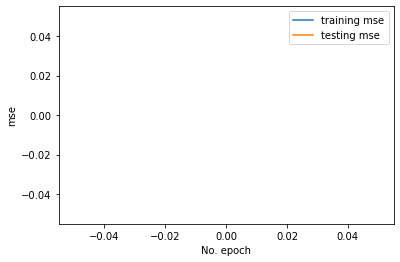

In [10]:
# plot learning curves
plt.plot(histories['ffn_train'].history['mse'], label='training mse')
plt.plot(histories['ffn_test'].history['mse'], label='testing mse')
plt.ylabel('mse')
plt.xlabel('No. epoch')
plt.legend(loc="upper right")
plt.show()
